# <u>Data Preparation & EDA</u>

### Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Importing the dataset

In [27]:
dataset = pd.read_csv('./Customers.csv')
df = pd.DataFrame(dataset)

### Clean Dataset

##### Check for missing values

In [28]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

#### outliar

In [29]:
df[df['Work Experience'] == df['Work Experience'].max()]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
392,393,Male,21,119116,30,Artist,17,4
405,406,Female,65,119889,11,Artist,17,6
473,474,Male,20,130813,92,Artist,17,5
566,567,Female,19,180331,14,Artist,17,5
603,604,Female,91,69720,78,Lawyer,17,6


#### clean

In [30]:
# Replace the missing values with mode
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

# Remove outliars
df = df.drop(df[df['Work Experience'] == 17].index)

#### Explode categorical variables into dummy variables

In [31]:
# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column called "Gender_Code"
df["Gender_Code"] = labelencoder.fit_transform(df["Gender"])

# Assigning numerical values and storing it in another column called "Profession_Code"
df["Profession_Code"] = labelencoder.fit_transform(df["Profession"])

# Display dataframe
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Code,Profession_Code
0,1,Male,19,15000,39,Healthcare,1,4,1,5
1,2,Male,21,35000,81,Engineer,3,3,1,2
2,3,Female,20,86000,6,Engineer,1,1,0,2
3,4,Female,23,59000,77,Lawyer,0,2,0,7
4,5,Female,31,38000,40,Entertainment,2,6,0,3
...,...,...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7,0,0
1996,1997,Female,91,73158,32,Doctor,7,7,0,1
1997,1998,Male,87,90961,14,Healthcare,9,2,1,5
1998,1999,Male,77,182109,4,Executive,7,2,1,4


# <b>Exploring the dataset</b>

### Checking the dimensions and size of the dataset

In [32]:
# Check the dimensions of the dataset
print("Number of rows and columns in the dataset:", df.shape)

# Check the size of the dataset
print("Size of the dataset:", df.size)

Number of rows and columns in the dataset: (1995, 10)
Size of the dataset: 19950


### Examining the first few rows and columns of the dataset

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Code,Profession_Code
0,1,Male,19,15000,39,Healthcare,1,4,1,5
1,2,Male,21,35000,81,Engineer,3,3,1,2
2,3,Female,20,86000,6,Engineer,1,1,0,2
3,4,Female,23,59000,77,Lawyer,0,2,0,7
4,5,Female,31,38000,40,Entertainment,2,6,0,3


# <b>Visualizing the data</b>

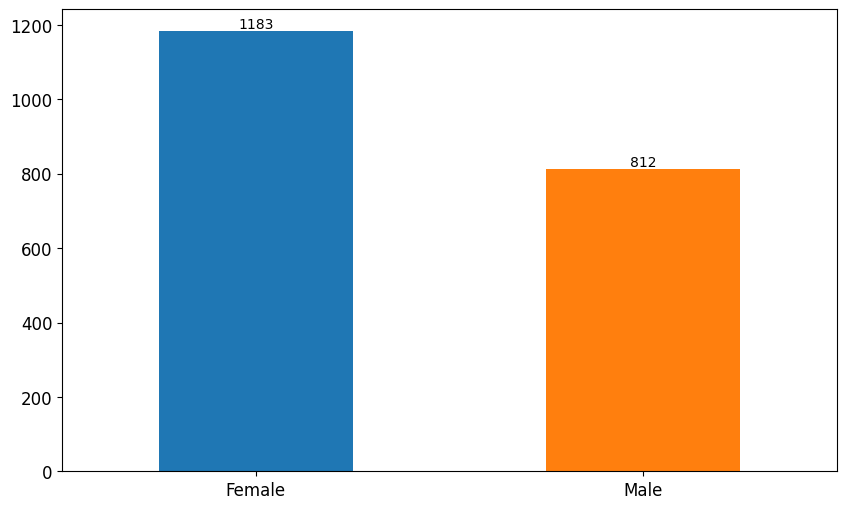

In [43]:
# Gender distribution
plt.figure(figsize=(10,6))
ax=df["Gender"].value_counts().plot(kind="bar", color=["tab:blue", "tab:orange"])
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge');

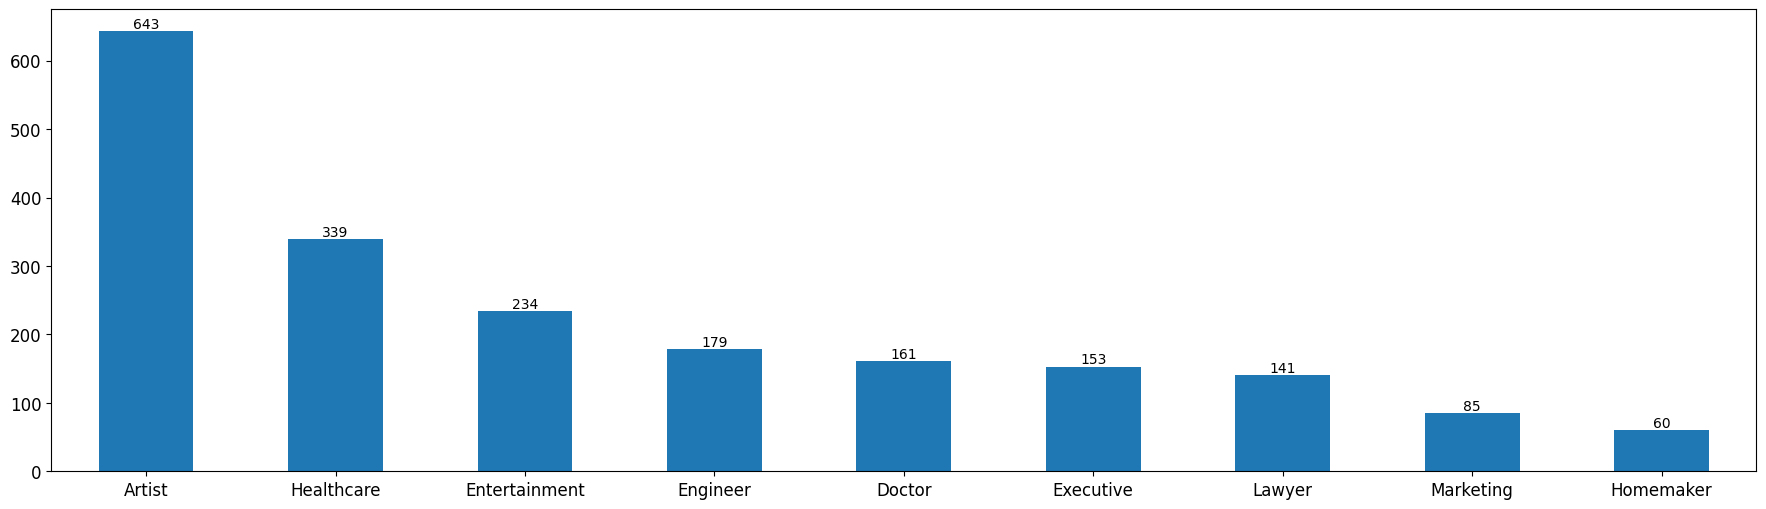

In [44]:
# Profession distribution
plt.figure(figsize=(22,6))
ax=df["Profession"].value_counts().plot(kind="bar")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge');

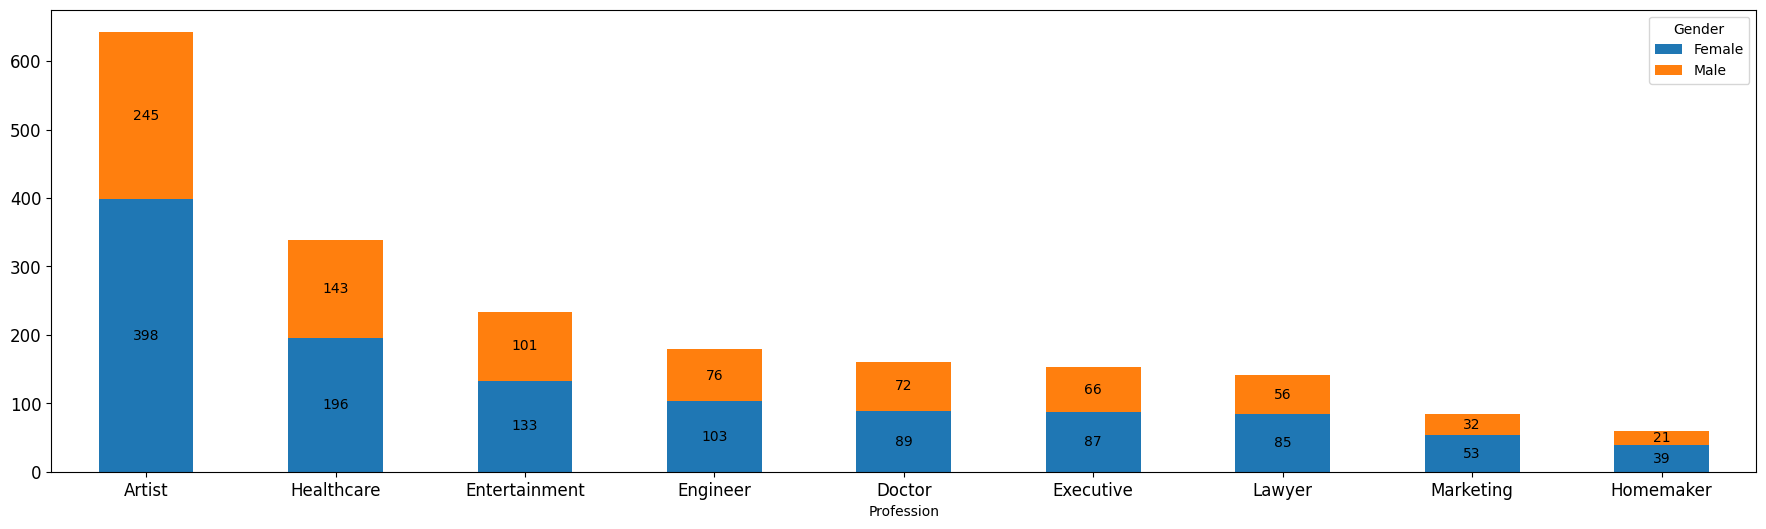

In [42]:
df_profession = pd.crosstab(df['Profession'],df['Gender'])
sorted_indices = (df_profession["Female"] + df_profession["Male"]).sort_values(ascending=False).index
ax=df_profession.loc[sorted_indices, :].plot(kind="bar",stacked=True, figsize=(22,6))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

ax.bar_label(ax.containers[0],label_type='center');
ax.bar_label(ax.containers[1],label_type='center');

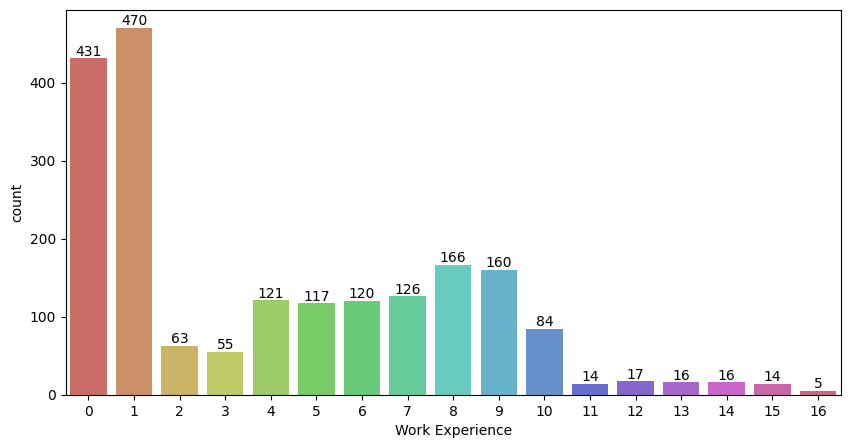

In [41]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x='Work Experience', data=df, palette="hls")
ax.bar_label(ax.containers[0]);

# <b>Analyzing the data</b>

### General statistical information

In [37]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Code,Profession_Code
count,1995.000000,1995,1995.000000,1995.000000,1995.000000,1995,1995.000000,1995.000000,1995.000000,1995.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN,NaN,NaN
freq,NaN,1183,NaN,NaN,NaN,643,NaN,NaN,NaN,NaN
mean,1001.782456,NaN,48.974436,110698.633584,50.977444,NaN,4.070175,3.764912,0.407018,2.784461
std,577.633256,NaN,28.425320,45758.034811,27.917452,NaN,3.873513,1.971556,0.491401,2.548164
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000
25%,502.500000,NaN,25.000000,74537.000000,28.000000,NaN,1.000000,2.000000,0.000000,0.000000
50%,1003.000000,NaN,48.000000,109759.000000,50.000000,NaN,3.000000,4.000000,0.000000,3.000000
75%,1501.500000,NaN,73.000000,149093.500000,75.000000,NaN,7.000000,5.000000,1.000000,5.000000
